In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns


In [8]:
# Plots accuracy, ood and confusion for a given dataset
#colors = ["#244C5B", "#EBB57C", "#C2504C", "#439888"]
pastel_colors = ['#F9B9AC', '#EAECC6', '#FFDBBE', '#FFEDB3', '#C4DF9B', '#AEE1E1', '#B0D8FF', '#B7B6E5', '#D7B8FF', '#FFB9D3', '#FFC6A2', '#FFEBAF', '#D1E2E5', '#C2D1E9', '#D9C3E6', '#E1C3C3', '#F3B9B9', '#F8E9A1', '#B1E7B6', '#B2B7F2']
pastel_colors = ['#CC4D19', '#CC9966', '#1E8B7A', '#704689', '#CCCC66', '#4D7326']
colors = ['darkred', 'darkorange', "darkgreen", "darkblue"]


def plot_accuracies(DATASETS, DISTANCE_TYPES, THRESHOLDS, SHUFFLED, 
                    PROBABILITY, labels, max_points, savepath, window = 1, log=True):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    handles = []
    zoom = max_points
    for dataset, color in zip(DATASETS, colors):
        hs = []
        for distance, threshold in zip(DISTANCE_TYPES, THRESHOLDS):
            dir_path = f"paper/results/{dataset}_{distance}_1_openCLIP_{SHUFFLED}_p{PROBABILITY}_slFalse/metrics_{format(threshold, '.2f')}.csv"
            df = pd.read_csv(dir_path) 
            print(len(df), dir_path)
            if distance =="inverse_cosine":
                ls = "--"
                label = f"{dataset} CosDis" 
                
            else:
                ls = "-"
                label = f"{dataset} l2" 
                
            idx = df['accuracy'].values > 0
            acc = df['accuracy'].values[idx][::len(df)//max_points]
            
            idx_moving_avg = df['moving_avg'].values > 0
            moving_avg = df['moving_avg'].values[idx_moving_avg]
            moving_avg = [moving_avg[i:i+window].mean() for i in range(len(moving_avg))]
            moving_avg = moving_avg[::len(df)//max_points]

            temp = ax[0].plot(acc,
                       label=f"ACC = {round(df['accuracy'].values[-1],3)}", 
                       alpha = 0.8, color = color, lw = 3, ls = ls)
            hs.append(temp[0])
            
            ax[1].plot(moving_avg,
                       label=f"{label}, ACC = {round(moving_avg[-window], 3)}",
                       alpha = 0.8, color = color, lw = 3, ls = ls)
        handles.append(hs)
        
    ax[0].set_title('Accuracy ↑', fontsize = 15)
    ax[0].set_xlim(0, zoom-window)
    ax[0].set_ylim(0.4, 1.1)
    if log:
        ax[0,0].set_yscale("log")
    ax[0].grid(True)
    ax[0].tick_params( labelright=True)
    
    legend2 = ax[0].legend(handles[0], DISTANCE_TYPES)
    ax[0].legend([h[0] for h in handles], DATASETS, loc = "lower right")
    ax[0].add_artist(legend2)
    
    
    ax[1].set_title('Moving Avg. Acc. ↑', fontsize = 15)
    ax[1].set_xlim(0, zoom-window)
    ax[1].set_ylim(0, 1.1)
    if log:
        ax[1,1].set_yscale("log")
    ax[1].legend()
    ax[1].grid(True)
    ax[1].tick_params( labelright=True)
    plt.savefig(savepath+"accuracy.pdf", bbox_inches='tight')

def plot_OOD(dfs, labels, markersize, log=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    for i, (df, label, color) in enumerate(zip(dfs, labels, pastel_colors)):
        print(df['ood'].values[-1], df['type1_ood_error'].values[-1], label)

        ax.plot(i+1, df['ood'].values[-1], label=label, alpha = 0.8, color = color, ls = "", marker = ".", markersize = markersize)
        ax.plot(i+1, df['type1_ood_error'].values[-1], alpha = 0.8, color = color, ls = "", marker = "*", markersize = markersize)

    ax.set_title('OOD ↑', fontsize = 15)
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(True)
    ax.tick_params( labelright=True)
    ax.set_xticklabels(labels)
    ax.set_xticks(range(1,len(labels)+1))
    
      
        


# Shuffled

**Accuracies**

162600 paper/results/CelebA_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv
162600 paper/results/CelebA_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv
49800 paper/results/CIFAR100_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv
49800 paper/results/CIFAR100_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv
19800 paper/results/CORE50_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv
20400 paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv


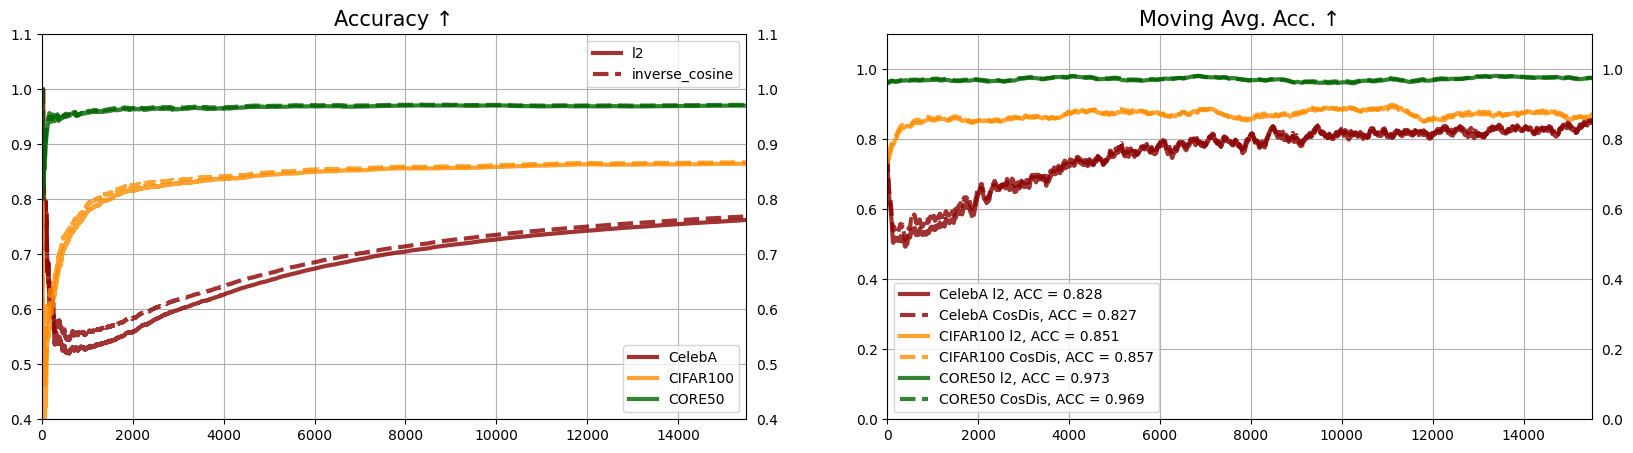

In [9]:
DATASETS = ['CelebA', "CIFAR100", "CORE50"]
DISTANCE_TYPES = ['l2', "inverse_cosine"]
THRESHOLDS = [18, 0.4]*2 

SHUFFLED = 'shuffled'
PROBABILITY = '100'

LABELS = ["l2", "CosDist"]*2

MAX_POINTS = 17000

SHUFFLED = 'shuffled'
PROBABILITY = '100'

plot_accuracies(DATASETS, DISTANCE_TYPES, THRESHOLDS, SHUFFLED, PROBABILITY, LABELS, MAX_POINTS, savepath=f"paper/results/All_1_openCLIP_{SHUFFLED}_p{PROBABILITY}_slFalse_",  window = 1500, log=False)

**selflabeling**


400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400


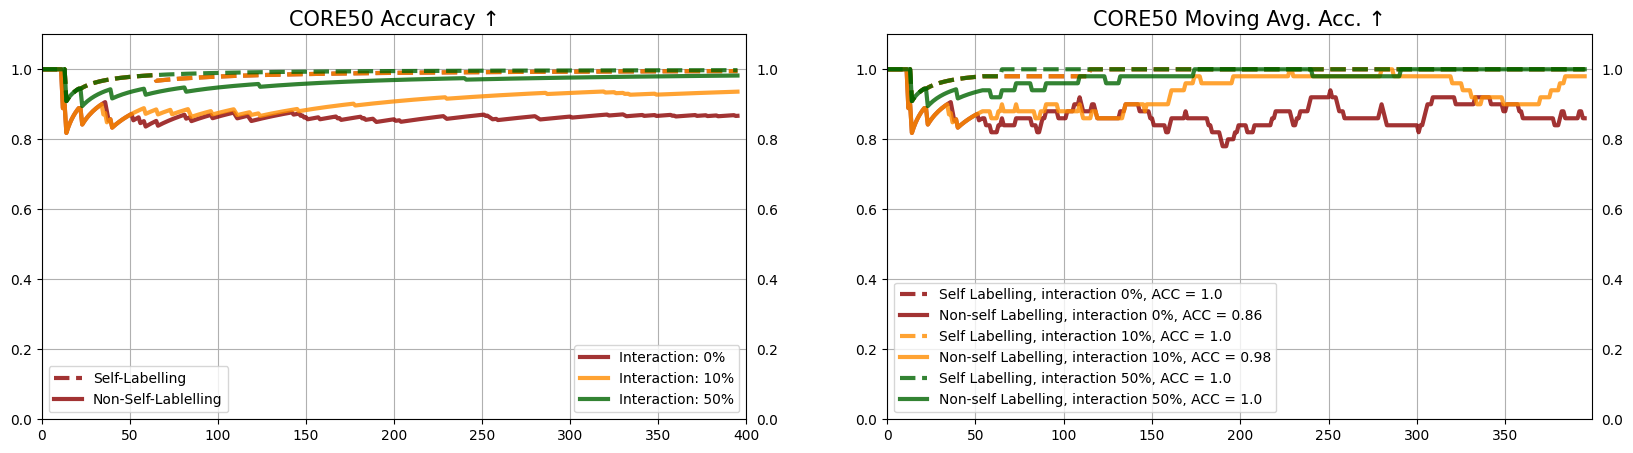

In [7]:
def plot_accuracies_self_learning(dataset, SELFLABELLINGS, THRESHOLDS, SHUFFLED, 
                    PROBABILITY, labels, max_points, savepath, window = 1, log=True):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    handles = []
    threshold = 0.4
    distance = "inverse_cosine"
    zoom = max_points
    for probability, color in zip(PROBABILITIES, colors):
        hs = []
        for selflabelling in SELFLABELLINGS:
            dir_path = f"paper/results/{dataset}_{distance}_1_openCLIP_{SHUFFLED}_p{probability}_sl{selflabelling}/metrics_{format(threshold, '.2f')}.csv"
            df = pd.read_csv(dir_path) 
            print(len(df), distance, max_points)
            if selflabelling =="True":
                ls = "--"
                label = f"Self Labelling" 
                
            else:
                ls = "-"
                label = f"Non-self Labelling" 
            label += f", interaction {probability}%"
            idx = df['accuracy'].values > 0
            acc = df['accuracy'].values[idx][::len(df)//max_points]

            idx_moving_avg = df['moving_avg'].values > 0
            moving_avg = df['moving_avg'].values[idx_moving_avg]
            moving_avg = [moving_avg[i:i+window].mean() for i in range(len(moving_avg))]
            moving_avg = moving_avg[::len(df)//max_points]


            temp = ax[0].plot(acc,
                       label=f"ACC = {round(df['accuracy'].values[-1],3)}", 
                       alpha = 0.8, color = color, lw = 3, ls = ls)
            hs.append(temp[0])
            
            ax[1].plot(moving_avg,
                       label=f"{label}, ACC = {round(moving_avg[-window], 3)}",
                       alpha = 0.8, color = color, lw = 3, ls = ls)
        handles.append(hs)
        
    ax[0].set_title(dataset +' Accuracy ↑', fontsize = 15)
    ax[0].set_xlim(0, zoom)
    ax[0].set_ylim(0, 1.1)
    if log:
        ax[0,0].set_yscale("log")
    ax[0].grid(True)
    ax[0].tick_params( labelright=True)
    
    legend2 = ax[0].legend(handles[0], ["Self-Labelling" if s=="True" else "Non-Self-Lablelling" for s in SELFLABELLINGS])
    ax[0].legend([h[1] for h in handles], ["Interaction: " + p + "%" for p in PROBABILITIES], loc = "lower right")
    ax[0].add_artist(legend2)
    
    
    ax[1].set_title(dataset +' Moving Avg. Acc. ↑', fontsize = 15)
    ax[1].set_xlim(0, zoom-window)
    ax[1].set_ylim(0, 1.1)
    if log:
        ax[1,1].set_yscale("log")
    ax[1].legend()
    ax[1].grid(True)
    ax[1].tick_params( labelright=True)
    plt.savefig(savepath+"accuracy.pdf", bbox_inches='tight')


dataset = 'CORE50'
LABELS = ["Selflabelled, interaction 0%", "Non-selflabelled, interaction 0%", "Selflabelled, interaction 10%", "Non-selflabelled, interaction 10%", ]

MAX_POINTS = 400
THRESHOLDS = [18, 0.4]

SHUFFLED = 'shuffled'
PROBABILITIES = ['0', "10", "50"]
SELFLABELLINGS = ["True", "False"]

plot_accuracies_self_learning(dataset, SELFLABELLINGS, THRESHOLDS, SHUFFLED, PROBABILITIES, LABELS, MAX_POINTS, savepath=f"paper/results/{dataset}_openCLIP_selflabelling_",  window = 1, log=False)


**OOD**

['paper/results/CORE50_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv', 'paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv', 'paper/results/CIFAR100_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv', 'paper/results/CIFAR100_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv', 'paper/results/CelebA_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv', 'paper/results/CelebA_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv']
0.9 0.0025575447570332 CORE50 l2
0.8 0.0025575447570332 CORE50 CosDist
0.37 0.0004024063902134 CIFAR100 l2
0.4 0.0098589565602301 CIFAR100 CosDist
0.0172119140625 0.0005181045146332 CelebA l2
0.02001953125 0.0026747145567939 CelebA CosDist


/tmp/ipykernel_5866/1522402592.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


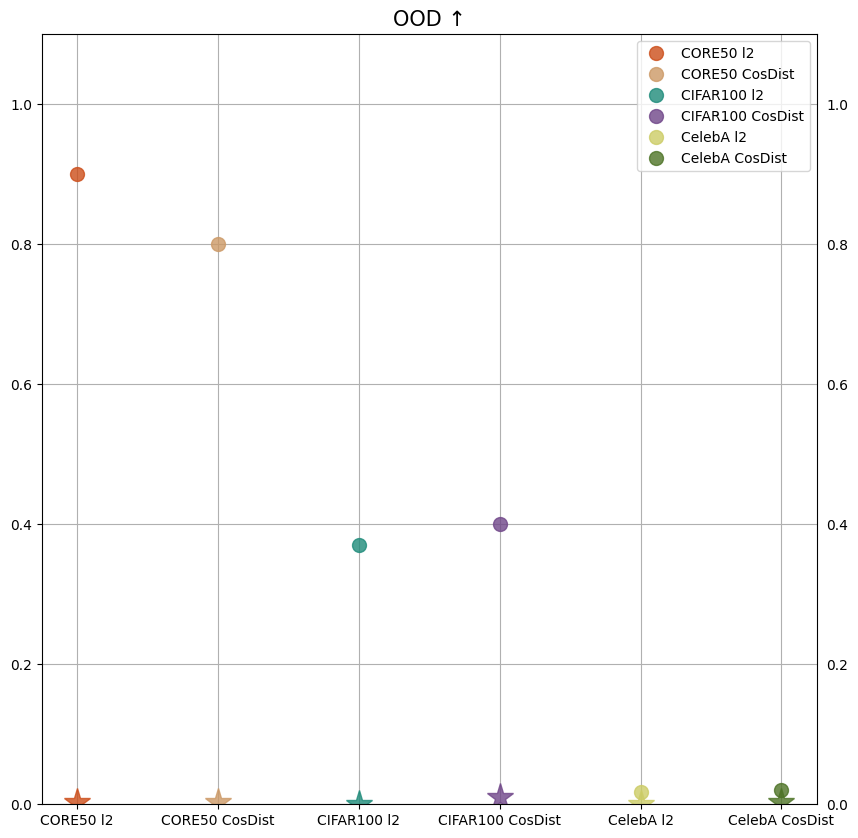

In [147]:
DATASETs = ["CORE50"]*2+['CIFAR100']*2+["CelebA"]*2 
MODEL = 'openCLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine"]*3#, "normalized_l2"]#, "inverse_cosine", "normalized_l2", "l1"]
LABELS = ["CORE50 l2", "CORE50 CosDist","CIFAR100 l2", "CIFAR100 CosDist","CelebA l2", "CelebA CosDist"]
PROCESSING_FRAMES = 1
THRESHOLDs = [18, 0.4]
MAX_POINTS = 1000000000

SHUFFLED = 'shuffled'
PROBABILITY = '100'

dir_paths = [f"paper/results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_{SHUFFLED}_p{PROBABILITY}_slFalse/metrics_{format(THRESHOLD, '.2f')}.csv" for (DATASET, DISTANCE_TYPE, THRESHOLD) in zip(DATASETs, DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
print(dir_paths)

plot_OOD(dfs, LABELS, markersize=20)

# Shuffled

In [118]:
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine", "normalized_l2", "l1"]
PROCESSING_FRAMES = 30
THRESHOLDs = [6.7, 1.25, 1.8, 2.7] 
MAX_POINTS = 500

dir_paths = [f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled/metrics_{format(THRESHOLD, '.2f')}.csv" for (DISTANCE_TYPE, THRESHOLD) in zip(DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
plot(dfs, DISTANCE_TYPEs, MAX_POINTS)

FileNotFoundError: [Errno 2] No such file or directory: 'results/CORE50_l2_30_CLIP_shuffled/metrics_6.70.csv'

# Accuracy vs Human interaction

In [ ]:
import pickle as pkl
import matplotlib.pyplot as plt
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPE = 'l2'
PROCESSING_FRAMES = 1
THRESHOLD = 6.7
MAX_POINTS = 500
accuracies = []
probabilities = [i*10 for i in range(11)]
for p in probabilities:
    path = f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled_p{p}/matrix_t6.70.pkl"
    with open(path, "rb") as f:
        m = pkl.load(f)
        accuracies.append(m.accuracy())
plt.plot(probabilities, accuracies, marker = ".", ls = "", ms = 10, color = "firebrick")
plt.ylim((0,1))
plt.grid()
plt.tick_params( labelright=True)
plt.xticks(probabilities)

In [ ]:
results/CORE50_l2_1_CLIP_shuffled_p60/matrix_t6.70.pkl